In [18]:
# training!
import csv
import nltk
nltk.download('stopwords') #needed to well.. remove stopwords from the extracted corpus
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB


# load dataset and get length
with open('tdata_cleaned.csv', newline='') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)

for i in range(0, len(data)):
  if (data[i][0] == 1):
    data.remove(i)
  if (data[i][0] == 2):
    data[i][0] = 1

tdata_length = len(data)

# tokenization!
corpus_train = []
classes = []

# grab stopwords!
stop = list(stopwords.words('english'))

for i in range(0, (tdata_length-1)):
  if (data[i][0] != 1):
    text = data[i][1]
    text = text.split()
    for j in text:
      if j in stop:
        text.remove(j)
    # because internet
    ps = PorterStemmer()
    text = ''.join(text)
    corpus_train.append(text)
    if (int(data[i][0]) == 2):
      classes.append(0)
    else:
      classes.append(1)


# get that bag! (of words)
cv = CountVectorizer()

X = cv.fit_transform(corpus_train).toarray()
y = classes

# splitting the data set into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

# do training :D
classifier = MultinomialNB(alpha=0.8, fit_prior=True, force_alpha=True)
classifier.fit(X_train,y_train)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


MultinomialNB(alpha=0.8)

precision: 0.838711319218241
recall: 0.997638939338903
f1: 0.9112979041088315


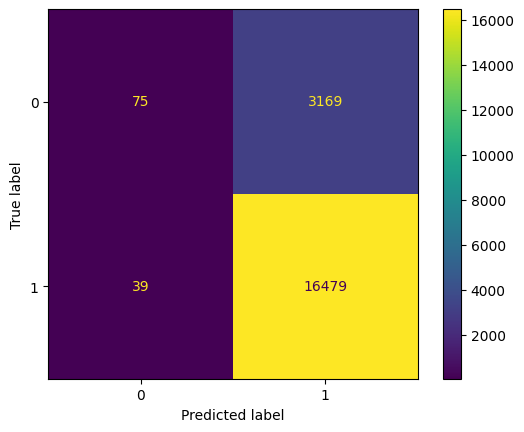

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# test the classifier
y_pred = classifier.predict(X_test)

#print confusion matrix
cm = confusion_matrix(y_test, y_pred)

# get values from matrix and calculate precision, recall and f1 score
tn, fp, fn, tp = cm.ravel()
precision = float(tp) / float(tp+fp)
recall = float(tp) / float(tp+fn)
f1 = (2*precision*recall) / (precision + recall)

print('precision: ' + str(precision))
print('recall: ' + str(recall))
print('f1: ' + str(f1))

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()